<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Normalized_difference_fluorescence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
group_order = [
    'Lp 240712m', 'Fa 240712m', 'Fp 240712m', 'Fr 240712m', 'Bi 240712m',
    'Lp 240711n', 'Fa 240711n', 'Fp 240711n', 'Fr 240711n', 'Bi 240711n',
  ]

In [2]:
stacked = False
sorting = False
abbreviations = False

y_label = '[a.u.]'
title_main =  ''

sorting_labels = 'groups' # or 'group'

def set_groups():
  group_order = unique_non_numeric_list(df['groups'])

  # Използваме ordered set за да запазим уникалните елементи в реда на поява
  group_order = list(dict.fromkeys(group_order))

  # Отпечатваме резултата
  print(group_order)

#set_groups()

In [16]:
import pandas as pd
import numpy as np
import os

# Get the list of files in the current directory
files = os.listdir('.')

# Find the CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]

file_name_type = csv_file.split('_')[1]
print (csv_file, file_name_type)

gr_2407_norm_diff.csv 2407


In [17]:
def try_read_csv(delimiter):
    df = pd.read_csv(csv_file, delimiter=delimiter, decimal='.', nrows=1, skiprows=0)
    if df.columns[0] != 'index':
        raise pd.errors.ParserError("Incorrect delimiter")
    return pd.read_csv(csv_file, delimiter=delimiter, decimal='.', skiprows=0, encoding='utf-8')  # Връща df, ако делимитерът е правилен

In [29]:
for delimiter in [';', '\t', ',']:
    try:
        df = try_read_csv(delimiter)
        break  # Излиза от цикъла, ако е намерен правилния делимитер
    except pd.errors.ParserError:
        pass  # Преминава към следващия делимитер
else:
    raise pd.errors.ParserError("Could not determine delimiter")  # Хвърля грешка, ако никой от делимитерите не е правилен

In [28]:
# обработка на csv файла, така че да се преобразува във вида, подходящ за ползване от кода
df.set_index('index', inplace=True)
df = df.T
df = df.reset_index()
df = df.rename(columns={'index': 'groups'})
df['groups'] = df['groups'].apply(lambda x: x.split('.')[0])
df = df[~df['groups'].str.contains('Unnamed')]

KeyError: "None of ['index'] are in the columns"

In [30]:
df.head()

,index,Lp 240712m,Fa 240712m,Fp 240712m,Fr 240712m,Bi 240712m,Lp 240711n,Fa 240711n,Fp 240711n,Fr 240711n,Bi 240711n
0,21,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,31,0,-0.000292,-0.001213,0.002692,0.000150,0.002367,0.000137,0.000021,0.001528,0.000193
2,41,0,-0.001540,-0.002850,0.004050,-0.000185,0.003405,-0.001276,-0.000892,0.001219,0.000004
3,51,0,-0.002538,-0.004777,0.006416,-0.000070,0.005429,-0.002463,-0.000775,0.001833,-0.000229
4,61,0,-0.003788,-0.006147,0.008283,-0.000440,0.007331,-0.002910,-0.001405,0.001481,-0.000669


/tmp/ipython-input-3515682856.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('tab20b')(all_unique_groups.index(group) % 10) # Use consistent color mapping
/tmp/ipython-input-3515682856.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('tab20b')(all_unique_groups.index(group) % 10) # Use consistent color mapping


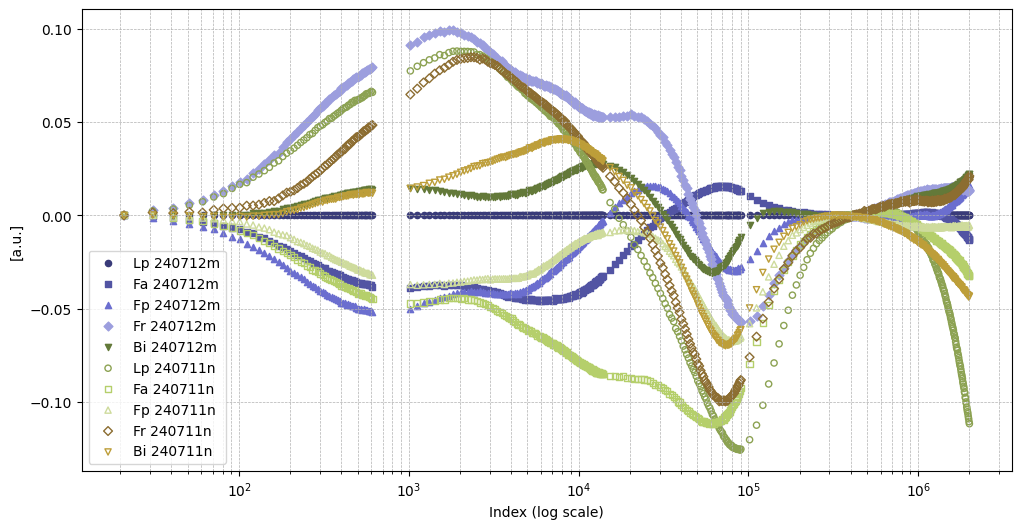

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe to a long format, using 'index' as id_vars and other columns as variables
# We need to exclude 'groups' from the columns that will be melted
df_melted = df.melt(id_vars='index', var_name='groups', value_name='y_values')

# Convert index to numeric, coercing errors (although it should be numeric based on previous output)
df_melted['index'] = pd.to_numeric(df_melted['index'], errors='coerce')

# Drop rows where index could not be converted to numeric
df_melted.dropna(subset=['index'], inplace=True)

# Separate data for 'm' and 'n' groups
df_m = df_melted[df_melted['groups'].str.endswith('m')]
df_n = df_melted[df_melted['groups'].str.endswith('n')]

# Define markers - using the same shapes but will control fill separately
unique_groups_m = df_m['groups'].unique()
unique_groups_n = df_n['groups'].unique()
# Combine unique groups to ensure consistent color mapping
all_unique_groups = list(df_melted['groups'].unique())


filled_markers_list = ['o', 's', '^', 'D', 'v', 'P', '*'] # Filled markers
unfilled_markers_list = ['o', 's', '^', 'D', 'v', 'P', '*'] # Unfilled markers (same shapes)

plt.figure(figsize=(12, 6))

# Plot 'm' groups with filled markers
for i, group in enumerate(unique_groups_m):
    subset = df_m[df_m['groups'] == group]
    marker = filled_markers_list[i % len(filled_markers_list)]
    color = plt.cm.get_cmap('tab20b')(all_unique_groups.index(group) % 10) # Use consistent color mapping
    plt.scatter(subset['index'], subset['y_values'], label=group, marker=marker, color=color, s=20, linewidth=1) # s is marker size, reduced to 20

# Plot 'n' groups with unfilled markers
for i, group in enumerate(unique_groups_n):
    subset = df_n[df_n['groups'] == group]
    marker = unfilled_markers_list[i % len(unfilled_markers_list)]
    color = plt.cm.get_cmap('tab20b')(all_unique_groups.index(group) % 10) # Use consistent color mapping
    plt.scatter(subset['index'], subset['y_values'], label=group, marker=marker, facecolors='none', edgecolors=color, s=20, linewidth=1) # s is marker size, reduced to 20


plt.xscale('log')
plt.xlabel('Index (log scale)')
plt.ylabel(y_label)
plt.title(title_main)
plt.legend(title='')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()